# EXPLORATORY DATA ANALYSIS

In [39]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from data_info_and_preprocessing import dataInfo
from data_info_and_preprocessing import data_preprocessing
from data_visualization import visualization

In [40]:
# Import the packagges for this procedure...
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [41]:
import warnings
warnings.filterwarnings(action = "ignore")

In [42]:
# Read the data frame into the workspace ....
original_df = pd.read_csv('../data/AdSmartABdata.csv')
original_df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [43]:
# Statistical description of the original dataframe
original_df.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [44]:
#Creating an instance of the "dataInfo" class over the original dataframe to access all the methods in the class
data_Info = dataInfo(original_df)

In [45]:
data_Info.get_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [46]:
# Check for missing values in the dataframe 
data_Info.find_column_based_missing_values()

,missing_count,type


In [47]:
original_df.shape

(8077, 9)

In [48]:
# Discover the coleration score between the different columns of the matrix
data_Info.find_matrix_correlation()

,hour,platform_os,yes,no
hour,1.000000,0.000062,0.013481,-0.021725
platform_os,0.000062,1.000000,0.054305,0.046941
yes,0.013481,0.054305,1.000000,-0.083098
no,-0.021725,0.046941,-0.083098,1.000000


# Data Preparation

In [49]:
#Creating an instance of the "dataInfo" class over the original dataframe to access all the methods in the class
data_Info = dataInfo(original_df)

In [50]:
# getting missing value column with percentage
data_Info.find_columns_missing_percentage(original_df)

,total_missing_values,missing_percentage
auction_id,0,0.0 %
experiment,0,0.0 %
date,0,0.0 %
hour,0,0.0 %
device_make,0,0.0 %
platform_os,0,0.0 %
browser,0,0.0 %
yes,0,0.0 %
no,0,0.0 %


In [51]:
# finding duplicate rows
data_Info.find_duplicates(original_df)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no


In [52]:
# find unique value counts on columns
data_Info.find_unique_value_count()

,Unique Value Count
experiment,2
yes,2
no,2
platform_os,3
date,8
browser,15
hour,24
device_make,270
auction_id,8077


#### Data is clean so no further operation

### Data Exploration

In [53]:
# getting dataframe columns list
cols = original_df.columns.tolist()
cols

['auction_id',
 'experiment',
 'date',
 'hour',
 'device_make',
 'platform_os',
 'browser',
 'yes',
 'no']

In [54]:
# numerical values
num_cols = original_df._get_numeric_data().columns
num_cols

Index(['hour', 'platform_os', 'yes', 'no'], dtype='object')

In [55]:
# catagorical values
list(set(cols) - set(num_cols))

['date', 'experiment', 'browser', 'device_make', 'auction_id']

In [56]:
# copying dataframe
response = original_df.copy(deep=True)

In [57]:
# getting users who only selects yes or no
response = response[response['yes'] == 1].append(response[response['no'] == 1])
response.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,0
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1,0
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1,0


In [58]:
# getting size of the new dataframe
response.shape

(1243, 9)

In [59]:
# finding the control group
control_df = response[response['experiment'] == 'control']
control_df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,0
100,0332a7f7-0336-4d48-96ad-75da00d916c0,control,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
118,03948b84-b5b1-4f26-81fc-e953218aef1a,control,2020-07-09,20,Samsung SM-G930F,6,Facebook,1,0
157,04b69bd8-4849-4489-adcf-08b96a265c40,control,2020-07-07,15,Generic Smartphone,6,Chrome Mobile,1,0


In [60]:
# accessing control df shape
control_df.shape

(586, 9)

In [61]:
# finding the exposed group
exposed_df = response[response['experiment'] == 'exposed']
exposed_df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1,0
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1,0
128,03ee1780-1fa3-4bec-926c-d543a81a6653,exposed,2020-07-04,11,Samsung SM-G981B,6,Chrome Mobile WebView,1,0
144,046644f4-b30c-48f9-b069-f804a97b77d9,exposed,2020-07-05,2,Generic Smartphone,6,Chrome Mobile WebView,1,0


In [62]:
# accessing exposed group
exposed_df.shape

(657, 9)

#### There are 657 peoples with exposed group

In [63]:
# grouping by experiment and its count
experiment_groups = response.groupby(['experiment']).agg({'experiment': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,experiment,count
0,exposed,657
1,control,586


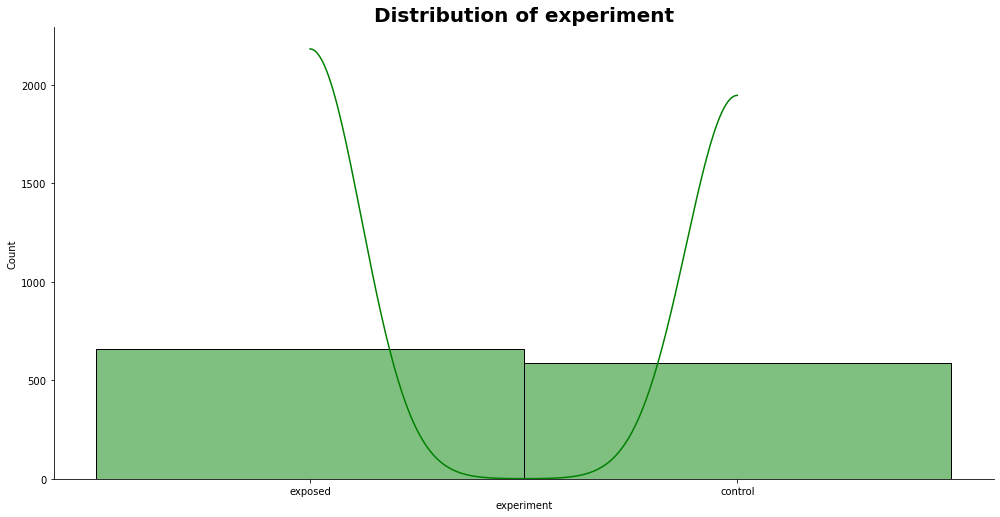

In [65]:
# Histogram visualization
fig = visualization.plot_hist(response,'experiment','green')

In [66]:
# grouping by date and its count
date_data = response.groupby(['date']).agg({'date': ['count']})
date_data.columns = ['count']
date_data = date_data.sort_values(by='count', ascending=False)
date_data = date_data.reset_index()
date_data.head()

,date,count
0,2020-07-03,325
1,2020-07-09,184
2,2020-07-08,177
3,2020-07-04,159
4,2020-07-10,124


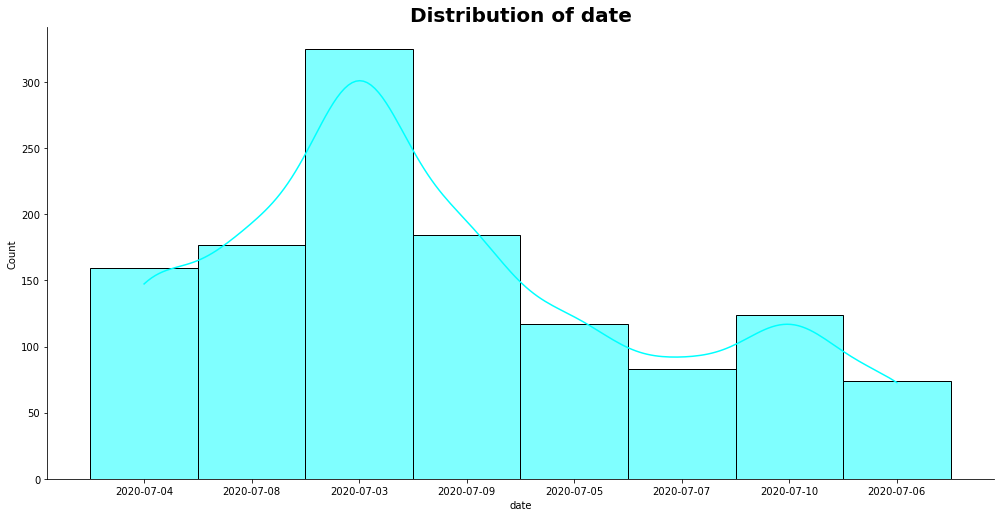

In [67]:
fig = visualization.plot_hist(response,'date','cyan')

##### There is much reaction for the Ad on day 2020-07-03 (July 03 / 2020)

In [68]:
# grouping by hour and its count
hour_data = response.groupby(['hour']).agg({'hour': ['count']})
hour_data.columns = ['count']
hour_data = hour_data.sort_values(by='count', ascending=False)
hour_data = hour_data.reset_index()
hour_data.head()

,hour,count
0,15,281
1,8,67
2,7,59
3,10,57
4,9,57


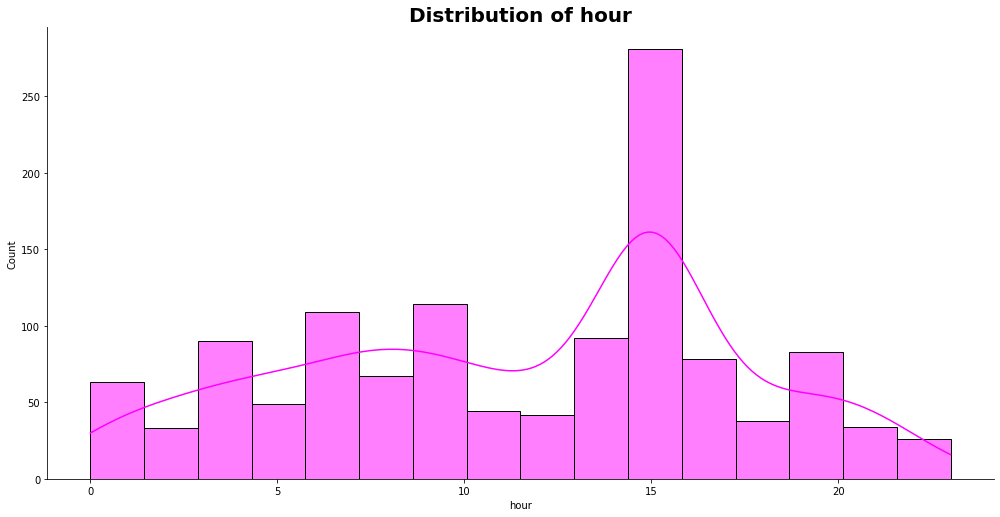

In [69]:
fig = visualization.plot_hist(response,'hour','magenta')